# Indexing, Slicing and Subsetting

*Estimated teaching time:* 30 min

*Estimated challenge time:* 30 min

*Key questions:*

  - "How can I access specific data within my data set?"
  - "How  can Python and Pandas help me to analyse my data?"
    
*Learning objectives:*

  - Describe what 0-based indexing is.
  - Manipulate and extract data using column headings and index locations.
  - Employ slicing to select sets of data from a DataFrame.
  - Employ label and integer-based indexing to select ranges of data in a dataframe.
  - Reassign values within subsets of a DataFrame.
  - Create a copy of a DataFrame.
  - "Query /select a subset of data using a set of criteria using the following operators: =, !=, >, <, >=, <=."
  - Locate subsets of data using masks.
  - Describe BOOLEAN objects in Python and manipulate data using BOOLEANs.

---

In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

# Indexing, Slicing and Subsetting


In this lesson, we will explore **ways to access different parts of the data** in a Pandas DataFrame using:

  - Indexing,
  - Slicing, and
  - Subsetting

## Ensure the Pandas package is installed

In [59]:
!pip install pandas matplotlib

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Loading our data

We will continue to use the surveys dataset that we worked with in the last lesson. Let's reopen and read in the data again:



In [2]:
# Make sure pandas is loaded
import pandas as pd

# Read in the survey CSV
surveys_df = pd.read_csv("data/surveys.csv")

## Indexing and Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges, or specific x,y index locations.




## Selecting data using Labels (Column Headings)

We use square brackets `[]` to select a subset of an Python object. For example,
we can select all data from a column named `species_id` from the `surveys_df`
DataFrame by name. There are two ways to do this:



In [3]:
# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id'].head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object

In [4]:
# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id.head()

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object


We can also create a new object that contains only the data within the
`species_id` column as follows:



In [5]:
# Creates an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']


We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.



In [6]:
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'site_id']].head()

,species_id,site_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3


In [7]:

# What happens if you ask for a column that doesn't exist?
surveys_df['speciess']



KeyError: 'speciess'

Python tells us what type of error it is in the traceback, at the bottom it says `KeyError: 'speciess'` which means that `speciess` is not a column name (or Key in the related python data type dictionary).

In [8]:
# What happens when you flip the order?
surveys_df[['site_id', 'species_id']].head()

,site_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM


## Extracting Range based Subsets: Slicing

**REMINDER**: Python Uses 0-based Indexing

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position
0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.



In [9]:
# Create a list of numbers:
a = [1, 2, 3, 4, 5]

![indexing diagram](images/slicing-indexing.svg)
![slicing diagram](images/slicing-slicing.svg)

## Challenge - Extracting data

1. What value does the code **a[0]** return?

2. How about this: **a[5]**

3. In the example above, calling `a[5]` returns an error. Why is that?

4. What about **a[len(a)]** ?




## Solutions - Extracting data

In [10]:
a[0]

1

In [11]:
# Solution #2
a[5]

IndexError: list index out of range

#### Solution #2

In above example, the error says `list index out of range`. This means we don't have index 5 in our list. The maximum index for `a` is `4`, as indexing starts at `0`.

In [12]:
# Solution #3
a[len(a)]

IndexError: list index out of range

#### Solution - # 4 - Extracting data 
This also gives an error, because len(a) is `5` which is not the maximum index

## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this with our `surveys data`:



In [13]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN



The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

Now lets select the `first 5 rows (rows 0, 1, 2, 3, 4)`.


In [15]:
surveys_df[:5]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [16]:
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN



We can also reassign values within subsets of our DataFrame.


Let's create a brand new clean dataframe from
the original data CSV file.



In [17]:
surveys_df = pd.read_csv("data/surveys.csv")

## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc` is primarily *label* based indexing. *Integers* may be used but
  they are interpreted as a *label*.
- `iloc` is primarily *integer* based indexing

To select a subset of rows **and** columns from our DataFrame, we can use the
`iloc` method. For example, we can select month, day and year (columns 2, 3
and 4 if we start counting at 1), like this:

`iloc[row slicing, column slicing]`



In [18]:
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling Python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's explore some other ways to index and select subsets of data:



In [19]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


In [20]:
# What does this do?
surveys_df.loc[0, ['species_id', 'site_id', 'weight']]

species_id     NL
site_id         2
weight        NaN
Name: 0, dtype: object

In [21]:
# What happens when you type the code below?
surveys_df.loc[[0, 10, 35549], :]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1.0,7.0,16.0,1977.0,2.0,NL,M,32.0,NaN
10,11.0,7.0,16.0,1977.0,5.0,DS,F,53.0,NaN
35549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`.
With `loc`, the both start bound and the stop bound are **inclusive**. When using
`loc`, integers *can* be used, but the integers refer to the
index label and not the position. For example, using `loc` and select 1:4
will get a different result than using `iloc` to select rows 1:4.

We can also select a specific data value using a row and
column location within the DataFrame and `iloc` indexing:

```python
# Syntax for iloc indexing to finding a specific data element
dat.iloc[row, column]
```

In following iloc example:

In [22]:
surveys_df.iloc[2, 6]

'F'

Remember that Python indexing begins at 0. So, the index location [2, 6]
selects the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenge - Range

1. What happens when you execute:

   - `surveys_df[0:1]`
   - `surveys_df[:4]`
   - `surveys_df[:-1]`

2. What happens when you call:

   - `surveys_df.iloc[0:4, 1:4]`


## Solution - Range

In [23]:
# Solution - Range - #1 (a)
surveys_df[0:1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [24]:
# Solution - Range - #1 (b)
surveys_df[:4]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [25]:
# Solution - Range - #1 (c)
surveys_df[:-1]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [26]:
# Solution - Range - #2
surveys_df.iloc[0:4, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977
3,7,16,1977


## Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that `have a year value of 2002`:



In [27]:
surveys_df[surveys_df.year == 2002].head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0



Or we can select all rows that `do not contain the year 2002`:



In [28]:
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN



We can define sets of criteria too:



In [29]:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
2275,2276,1,15,1980,11,DS,M,47.0,132.0
2276,2277,1,15,1980,8,PF,M,15.0,8.0
2277,2278,1,15,1980,9,OT,M,21.0,23.0
2278,2279,1,15,1980,11,DM,F,36.0,36.0
2279,2280,1,15,1980,21,OT,F,20.0,21.0



### Python Syntax Cheat Sheet

Use can use the syntax below when querying data by criteria from a DataFrame.
Experiment with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`




## Challenge - Queries

1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
   the year 1999 and that contain weight values less than or equal to 8. How
   many rows did you end up with? What did your neighbor get?

2. **(Extra)** Use the `isin` function to find all plots that contain `PB` and `PL` species
in the "surveys" DataFrame. How many records contain these values?

You can use the `isin` command in Python to query a DataFrame based upon a
   list of values as follows:

```python
surveys_df[surveys_df['species_id'].isin([listGoesHere])]
```


## Solution - Queries 

In [30]:
## Solution - Queries #1
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [31]:
# when only interested in how many, the sum of True values could be used as well: 
sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8))

5

In [37]:
# Solution - Queries #2
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['site_id'].unique()

array([ 1, 10,  6, 24,  2, 23, 19, 12, 20, 22,  3,  9, 14, 13, 21,  7, 11,
       15,  4, 16, 17,  8, 18,  5])

In [38]:
# To get number of records
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])].shape

(2927, 9)

## Extra Challenges


3. **(Extra)** Create a query that finds all rows with a
   weight value greater than (`>`) or equal to 0.

4. **(Extra)** The `~` symbol in Python can be used to return the OPPOSITE of the
   selection that you specify in Python. It is equivalent to **is not in**.
   Write a query that selects all rows with sex NOT equal to 'M' or 'F' in
   the "surveys" data.

In [34]:
sum(surveys_df["weight"]>=0)

32283

In [35]:
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]


,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
92,93,8,20,1977,18,DM,NaN,NaN,42.0
105,106,8,20,1977,12,NL,NaN,NaN,NaN
106,107,8,20,1977,18,NL,NaN,NaN,NaN
109,110,8,20,1977,10,DS,NaN,NaN,NaN
120,121,8,21,1977,15,NL,NaN,NaN,NaN


# Using masks to identify a specific condition

A **mask** can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example,

In [39]:
# Set x to 5
x = 5

In [40]:
# What does the code below return?
x > 5

False

In [41]:
# How about this?
x == 5

True

### Finding Missing Values

Let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
The `isnull` method will compare each cell with a null value. If an element
has a null value, it will be assigned a value of  `True` in the output object.



In [42]:
pd.isnull(surveys_df).head()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True


### How to select rows with missing data

To select the rows where there are null values, we can use
the mask as an index to subset our data as follows:



In [44]:
# To select just the rows with NaN values, we can use the 'any()' method
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


### Explaination

Notice that we have `4873` observations/rows that contain one or more missing values. 
Thats roughly `14%` of data contains missing values.

We have used `[]` convension to select subset of data. 


**(axis=1)** is a numpy convention to specify columns. 

Note that the `weight` column of our DataFrame contains many `null` or `NaN`
values. Next, we will explore ways of dealing with this.

If we look at the `weight` column in the surveys
data we notice that there are NaN (**N**ot **a** **N**umber) values. *NaN* values are undefined
values that cannot be represented mathematically. Pandas, for example, will read
an empty cell in a CSV or Excel sheet as a NaN. NaNs have some desirable properties: if we
were to average the `weight` column without replacing our NaNs, Python would know to skip
over those cells.



### Handling missing values

Dealing with missing data values is always a challenge. It's sometimes hard to
know why values are missing - was it because of a data entry error? Or data that
someone was unable to collect? Should the value be 0? We need to know how
missing values are represented in the dataset in order to make good decisions.
If we're lucky, we have some metadata that will tell us more about how null
values were handled.

For instance, in some disciplines, like Remote Sensing, missing data values are
often defined as -9999. Having a bunch of -9999 values in your data could really
alter numeric calculations. Often in spreadsheets, cells are left empty where no
data are available. Pandas will, by default, replace those missing values with
NaN. However it is good practice to get in the habit of intentionally marking
cells that have no data, with a no data value! That way there are no questions
in the future when you (or someone else) explores your data.

### Where Are the NaN's?

Let's explore the NaN values in our data a bit further. Using the tools we
learned in lesson 02, we can figure out how many rows contain NaN values for
weight. We can also create a new subset from our data that only contains rows
with weight values > 0 (i.e., select meaningful weight values):



In [45]:
## How many missing values are there in weight column?
len(surveys_df[pd.isnull(surveys_df.weight)])

3266

In [46]:
# How many rows have weight values?
len(surveys_df[surveys_df.weight> 0])

32283


We can replace all NaN values with zeroes using the `.fillna()` method (after
making a copy of the data so we don't lose our work):



In [47]:
# Creat a new DataFrame using copy
df1 = surveys_df.copy()

# Fill all NaN values with 0
df1['weight'] = df1['weight'].fillna(0)


However NaN and 0 yield different analysis results. The mean value when NaN
values are replaced with 0 is different from when NaN values are simply thrown
out or ignored.



In [48]:
## Mean of weights ignoring NaN
surveys_df['weight'].mean()

42.672428212991356

In [50]:
## Mean of weights replacing NaN with zero
df1['weight'].mean()

38.751976145601844


### _Extra Information_
We can fill NaN values with any value that we chose. The code below fills all
NaN values with a mean for all weight values.



In [51]:
df1['weight'] = surveys_df['weight'].fillna(surveys_df['weight'].mean())

In [52]:
df1['weight'].mean()

42.67242821299182

## Writing Out Data to CSV

We've learned about using manipulating data to get desired outputs. But we've also discussed
keeping data that has been manipulated separate from our raw data. Something we might be interested
in doing is working with only the columns that have full data.



Now, let's drop all the rows that contain missing values. We will use the command `dropna`.
By default, dropna removes columns that contain missing data for even just one row.



In [53]:
df_na = surveys_df.dropna()


If you now type ```df_na```, you should observe that the resulting DataFrame has 30676 rows
and 9 columns, much smaller than the 35549 row original.

We can now use the `to_csv` command to do export a DataFrame in CSV format. Note that the code
below will by default save the data into the current working directory. We can
save it to a different folder by adding the foldername and a slash before the filename:
`df1.to_csv('foldername/out.csv')`. We use `'index=False'` so that
pandas doesn't include the index number for each line.



In [31]:
# Write DataFrame to CSV
df_na.to_csv('data_output/surveys_complete.csv', index=False)

## Recap

What we've learned:

+ How to subset and index the dataframe
+ What NaN values are, how they might be represented, and what this means for your work
+ How to replace NaN values, if desired
+ How to use `to_csv` to write manipulated data to a file.



## _Extra_
We can run `isnull` on a particular column too. What does the code below do?



In [54]:
# What does this do?
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']
print(empty_weights)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
35138   NaN
35168   NaN
35187   NaN
35256   NaN
35259   NaN
35277   NaN
35279   NaN
35322   NaN
35370   NaN
35378   NaN
35384   NaN
35387   NaN
35403   NaN
35448   NaN
35452   NaN
35457   NaN
35477   NaN
35485   NaN
35495   NaN
35510   NaN
35511   NaN
35512   NaN
35514   NaN
35527   NaN
35529   NaN
35530   NaN
35543   NaN
35544   NaN
35545   NaN
35548   NaN
Name: weight, Length: 3266, dtype: float64



Let's take a minute to look at the statement above. We are using the Boolean
object `pd.isnull(surveys_df['weight'])` as an index to `surveys_df`. We are
asking Python to select rows that have a `NaN` value of weight.




## _Extra Challenges - Putting it all together_

 1. Create a new DataFrame that only contains observations with sex values that
   are **not** female or male. Assign each sex value in the new DataFrame to a
   new value of 'x'. Determine the number of null values in the subset.
   
 2. Create a new DataFrame that contains only observations that are of sex male
   or female and where weight values are greater than 0. Create a stacked bar
   plot of average weight by plot with male vs female values stacked for each
   plot.
  3. Count the number of missing values per column. Hint: The method .count() gives you the number of non-NA observations per column. 



## Solution _Extra Challenges_

In [55]:
# Solution extra challenge 1
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
new['sex']='x'
print(len(new))

2511


In [56]:
# We can verify the number of NaN values with
sum(surveys_df['sex'].isnull())

2511

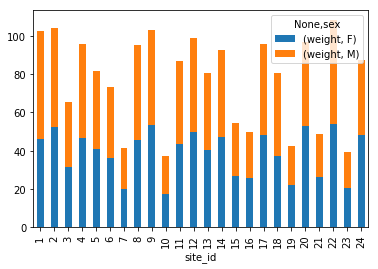

In [61]:
# Solution extra challenge 2

# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
							surveys_df["weight"] > 0.][["sex", "weight", "site_id"]]

# calculate the mean weight for each site id and sex combination:
stack_selection = stack_selection.groupby(["site_id", "sex"]).mean().unstack()

# Plot inside jupyter notebook
%matplotlib inline

# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)